In [1]:
!git clone https://github.com/BryantSmith91/MoreFinalData.git

The system cannot find the path specified.
fatal: destination path 'MoreFinalData' already exists and is not an empty directory.


In [25]:
import matplotlib.pyplot as plt
import socket
import glob
import os
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,concatenate,Conv2DTranspose

# import imageio
# # import cv2
# import matplotlib.pyplot as plt
# %matplotlib inline
# from skimage.filters import threshold_otsu
# from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# from glob import glob
# import scipy.misc
# from matplotlib.patches import Circle,Ellipse
# from matplotlib.patches import Rectangle
# import os
# from PIL import Image
# from tensorflow import keras
# from tensorflow.keras import layers
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg19 import (
#     VGG19, 
#     preprocess_input, 
#     decode_predictions
# )
# import keras
# from matplotlib import pyplot as plt
# import numpy as np
# import gzip
# %matplotlib inline
# from keras.layers.normalization import BatchNormalization
# from tensorflow.keras.preprocessing import image

In [40]:
from glob import glob
data = glob('MoreFinalData/*')
len(data)

6000

In [41]:
import skimage
from tensorflow.keras.preprocessing import image

matrix = []
array = []

for x in range(0, len(data)):
    image_size =(224,224)
    im = image.load_img(data[x], target_size=image_size, color_mode='grayscale')
    matrix.append(im)
    array.append(skimage.img_as_float(matrix[x]))
imagearray = np.asarray(array)

MemoryError: Unable to allocate array with shape (6000, 224, 224) and data type float64

In [15]:
imagearray = imagearray.reshape(-1, 224,224, 1)

In [16]:
batch_size = 52
epochs = 50
inChannel = 1
x, y = 224, 224
input_img= Input(shape=(x,y,inChannel))

In [17]:
from sklearn.model_selection import train_test_split


train_X, real_X, train_ground, real_ground = train_test_split(imagearray, imagearray, 
                                                    test_size=0.2,
                                                    random_state=13)

In [18]:
real_X.shape
train_X.shape

(4800, 224, 224, 1)

In [28]:
# 

def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #7 x 7 x 64
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3) #7 x 7 x 256
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
#     conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    
    #decoder
    
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    up1 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv4], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up1)
    up2 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv3], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
    up3 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv2], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
    up4 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv9), conv1], axis=3)
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv10)
    return decoded
#     conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(conv6) #7 x 7 x 128
#     up1 = UpSampling2D((2,2))(conv4) # 14 x 14 x 128
#     conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 14 x 14 x 64
#     up2 = UpSampling2D((2,2))(conv5) # 28 x 28 x 64
#     decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up2) # 28 x 28 x 1
#     return decoded

In [29]:
# 

autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [30]:
autoencoder.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 1)  0                                            
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 224, 224, 32) 320         input_2[0][0]                    
__________________________________________________________________________________________________
max_pooling2d_5 (MaxPooling2D)  (None, 112, 112, 32) 0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
conv2d_13 (Conv2D)              (None, 112, 112, 64) 18496       max_pooling2d_5[0][0]            
__________________________________________________________________________________________________
max_poolin

In [31]:
# 

autoencoder_train = autoencoder.fit(train_X, train_ground,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(real_X, real_ground))

# for x in range(len(train_X)):


W0822 09:41:42.928852  9752 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0822 09:41:42.933334  9752 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Train on 4800 samples, validate on 1200 samples
Epoch 1/50
4800/4800 [==============================] - 58s 12ms/step - loss: 0.0413 - val_loss: 0.0077
Epoch 2/50
4800/4800 [==============================] - 49s 10ms/step - loss: 0.0050 - val_loss: 0.0039
Epoch 3/50
4800/4800 [==============================] - 48s 10ms/step - loss: 0.0031 - val_loss: 0.0016
Epoch 4/50
4800/4800 [==============================] - 50s 10ms/step - loss: 0.0023 - val_loss: 0.0017
Epoch 5/50
4800/4800 [==============================] - 50s 11ms/step - loss: 0.0022 - val_loss: 0.0019
Epoch 6/50
4800/4800 [==============================] - 50s 11ms/step - loss: 0.0016 - val_loss: 8.0886e-04
Epoch 7/50
4800/4800 [==============================] - 51s 11ms/step - loss: 0.0013 - val_loss: 0.0014
Epoch 8/50
4800/4800 [==============================] - 48s 10ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 9/50
4800/4800 [==============================] - 49s 10ms/step - loss: 9.6301e-04 - val_loss: 9.8013e-04
Epoc

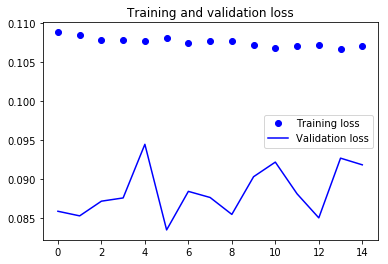

In [0]:
# 50 batch size -- too small

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(15)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

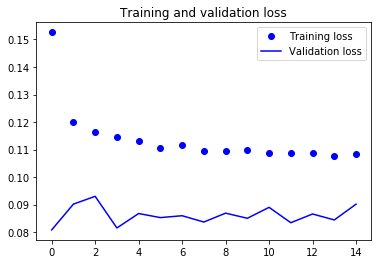

In [0]:
#136 batch size -- too big
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(15)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

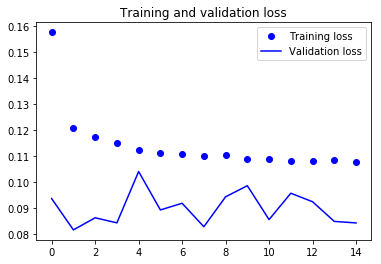

In [0]:
#115 batch size - 

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(15)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

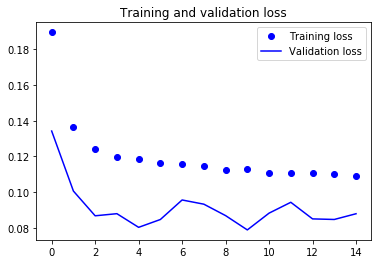

In [0]:
#256 batch size?? - 512 breaks it

loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(15)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

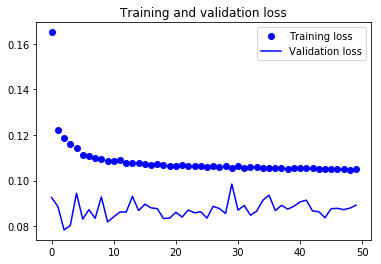

In [16]:
#128 batch size + 50 epoch
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [34]:
autoencoder.save('lastgpu.h5')

In [35]:
autoencoder.save_weights('lastgpu.h5')

In [36]:
autoencoder.load_weights('lastgpu.h5')

In [37]:
autoencoder.compile(loss='mean_squared_error',optimizer=RMSprop())

In [38]:
pred = autoencoder.predict(real_X)

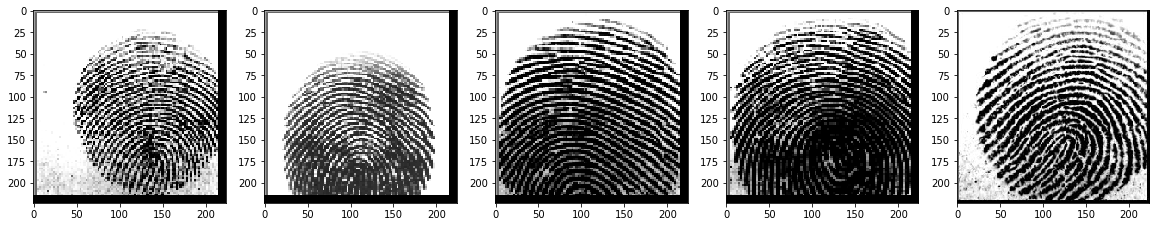

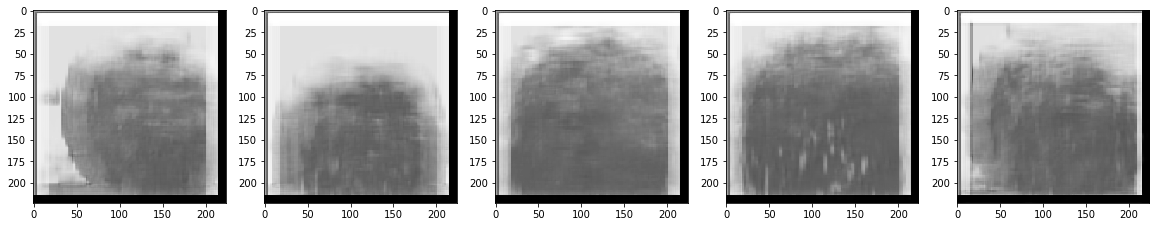

In [34]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

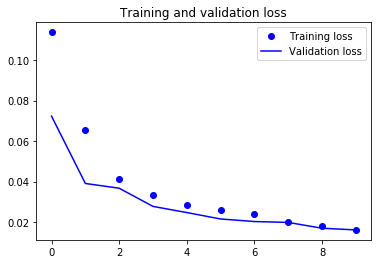

In [12]:
#maybe not massively overfitting this time?
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

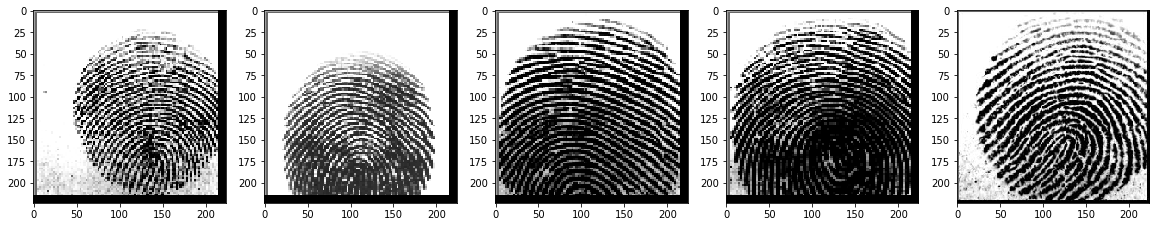

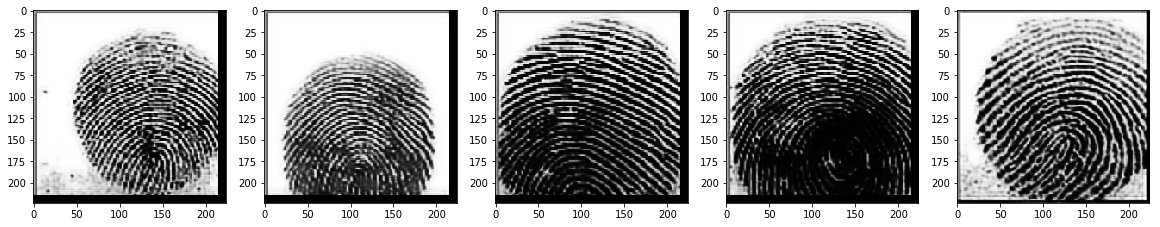

In [15]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

In [42]:
# altered = glob('Altered/Altered-Hard/*')
# # altered = glob('smallaltered/*')
# print(f"{len(data)} is the training data and {len(altered)} is the test data.")
altmat = []
altarr = []

for x in range(0, len(altered)):
    image_size =(224,224)
    ima = image.load_img(altered[x], target_size=image_size, color_mode='grayscale')
    altmat.append(ima)
    altarr.append(skimage.img_as_float(altmat[x]))
alteredarray = np.asarray(altarr)
alteredarray = alteredarray.reshape(-1, 224,224, 1)

In [59]:
# alteredarray[1]
pred = autoencoder.predict(alteredarray)

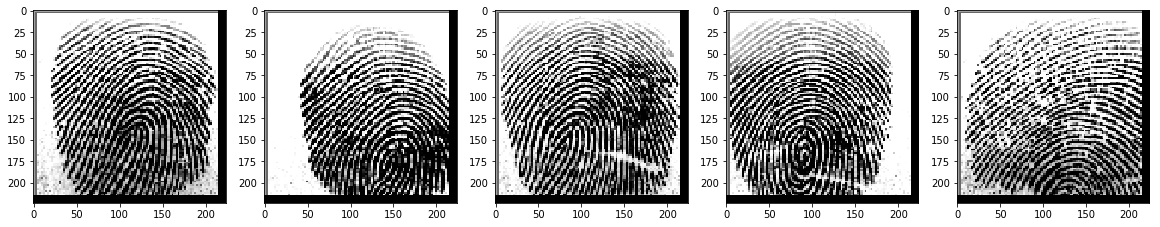

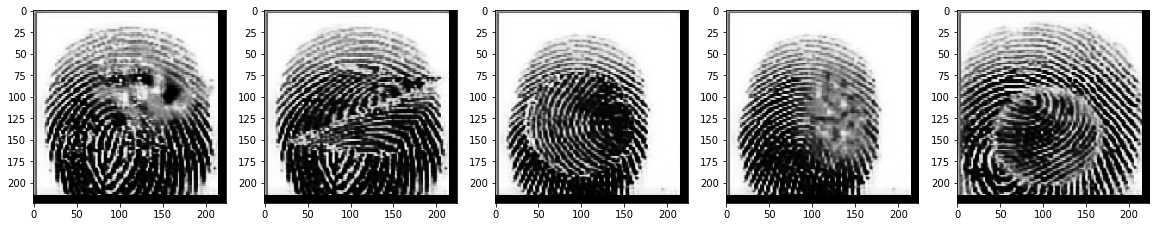

In [44]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(imagearray[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

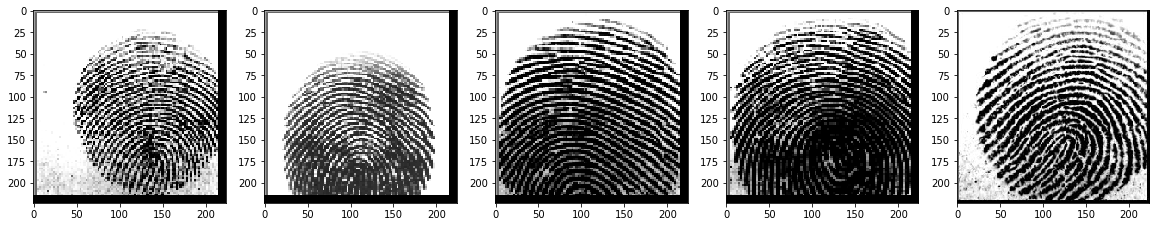

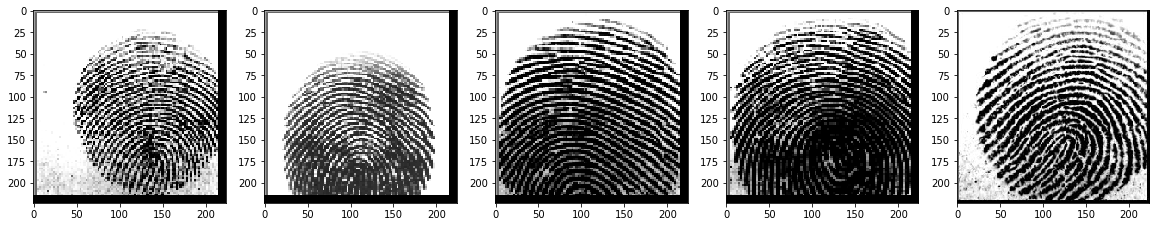

In [35]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()

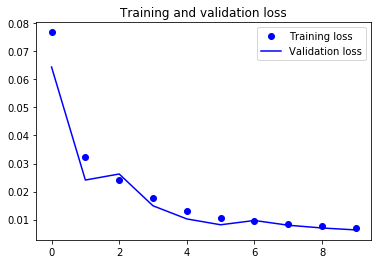

In [21]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(10)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

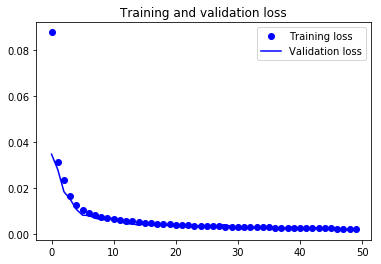

In [10]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

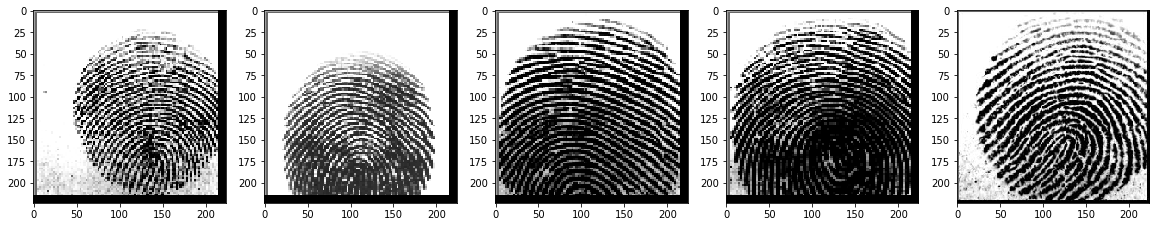

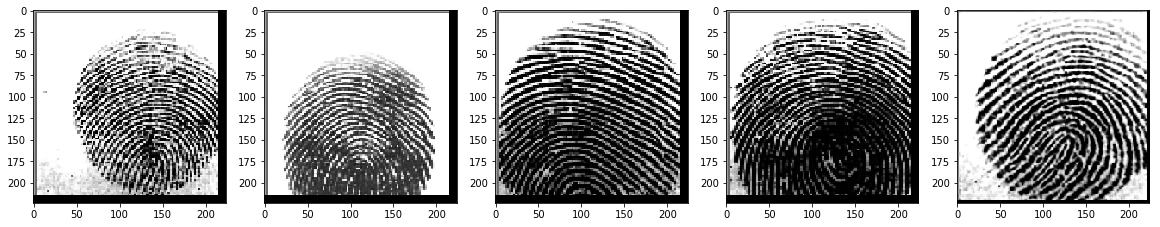

In [13]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

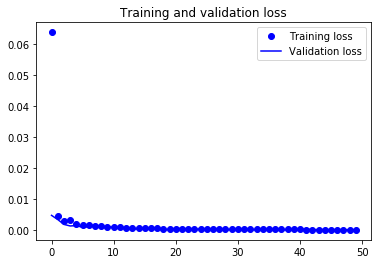

In [34]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

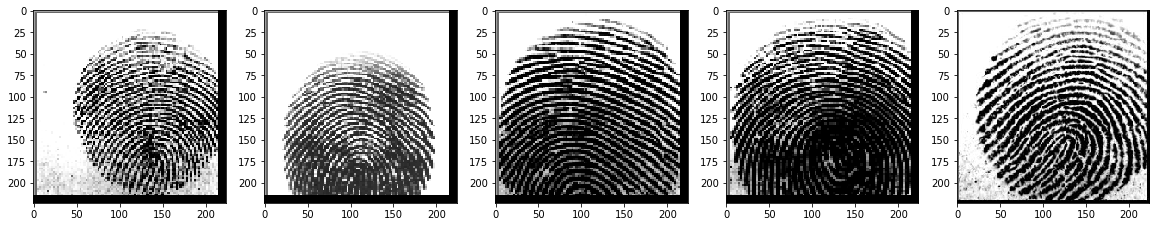

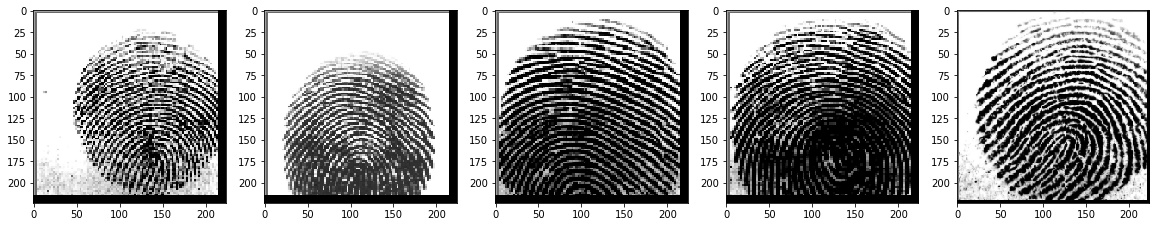

In [35]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

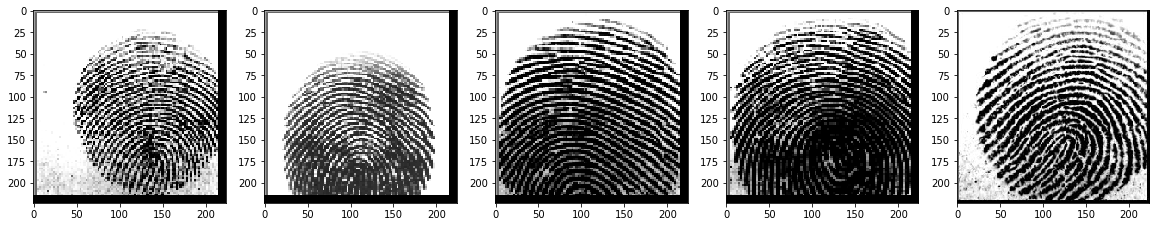

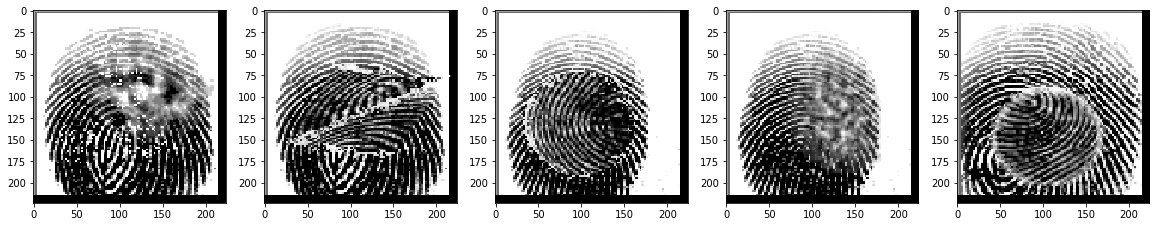

In [44]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

In [47]:
# altered = glob('Altered/Altered-Hard/*')
altered = glob('smallaltered/*')
print(f"{len(data)} is the training data and {len(altered)} is the test data.")
altmat = []
altarr = []

for x in range(0, len(altered)):
    image_size =(224,224)
    ima = image.load_img(altered[x], target_size=image_size, color_mode='grayscale')
    altmat.append(ima)
    altarr.append(skimage.img_as_float(altmat[x]))
alteredarray = np.asarray(altarr)
alteredarray = alteredarray.reshape(-1, 224,224, 1)

6000 is the training data and 129 is the test data.


In [53]:
from sklearn.model_selection import train_test_split


alt_x, realalt_x, alt_ground, alt_real = train_test_split(alteredarray, alteredarray, 
                                                    test_size=0.2,
                                                    random_state=13)

In [ ]:
# 

batch_size = 52
epochs = 50
inChannel = 1
x, y = 224, 224
input_img= Input(shape=(x,y,inChannel))

In [56]:
autoencoder_train = autoencoder.fit(alt_x, alt_ground,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(realalt_x, alt_real))

Train on 103 samples, validate on 26 samples
Epoch 1/50
103/103 [==============================] - 12s 115ms/step - loss: 1.2464e-04 - val_loss: 2.7409e-04
Epoch 2/50
103/103 [==============================] - 1s 10ms/step - loss: 6.6495e-04 - val_loss: 0.0013
Epoch 3/50
103/103 [==============================] - 1s 10ms/step - loss: 8.0663e-04 - val_loss: 9.8348e-05
Epoch 4/50
103/103 [==============================] - 1s 10ms/step - loss: 7.8226e-05 - val_loss: 5.5328e-05
Epoch 5/50
103/103 [==============================] - 1s 10ms/step - loss: 5.1682e-05 - val_loss: 5.1101e-05
Epoch 6/50
103/103 [==============================] - 1s 10ms/step - loss: 4.8575e-05 - val_loss: 4.9905e-05
Epoch 7/50
103/103 [==============================] - 1s 10ms/step - loss: 4.7757e-05 - val_loss: 5.0978e-05
Epoch 8/50
103/103 [==============================] - 1s 10ms/step - loss: 5.0975e-05 - val_loss: 6.6315e-05
Epoch 9/50
103/103 [==============================] - 1s 10ms/step - loss: 7.4625e-05

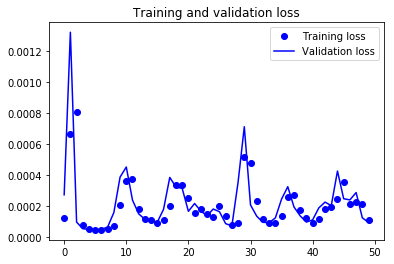

In [57]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

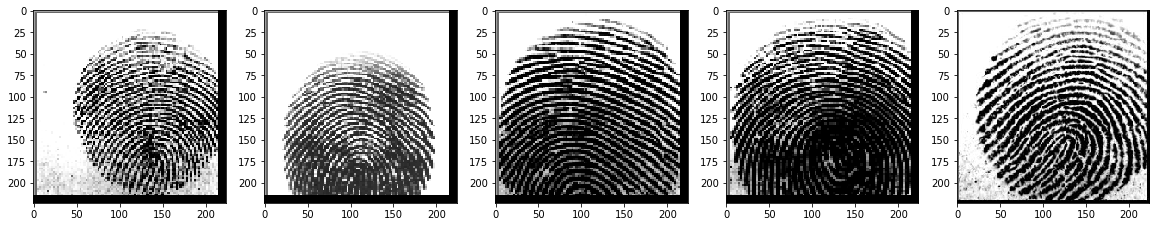

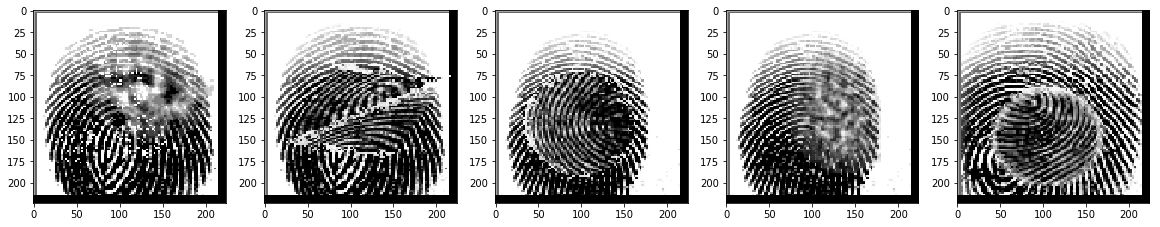

In [60]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()

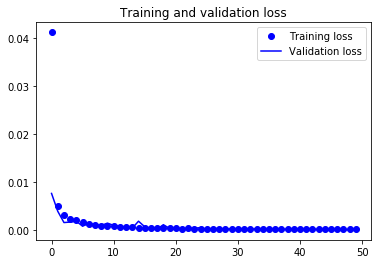

In [33]:
#maybe not massively overfitting this time?
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

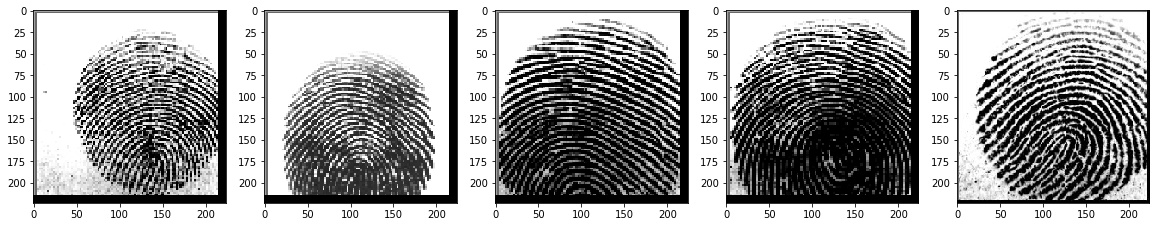

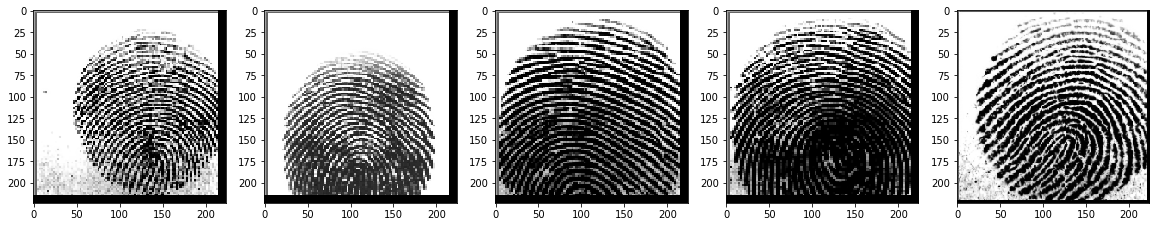

In [39]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()